In [3]:
%matplotlib inline  
import nltk
from urllib.request import urlopen
# nltk.download()

In [4]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [5]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [6]:
text1.similar("monstrous")

maddens uncommon trustworthy mystifying exasperate puzzled subtly
untoward vexatious true horrible domineering lazy careful curious
doleful fearless singular abundant reliable


In [7]:
text2.common_contexts(["monstrous", "very"])

is_pretty a_lucky be_glad am_glad a_pretty


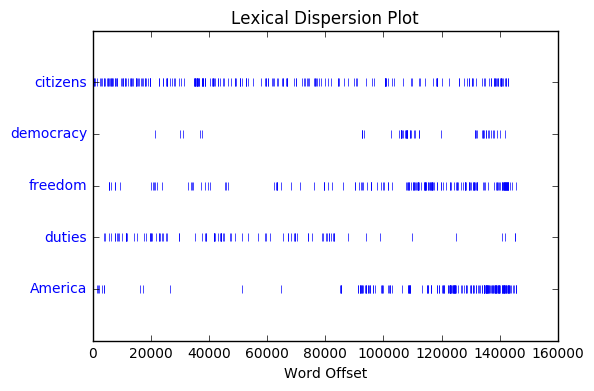

In [8]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [9]:
def lexical_diversity(text):
    return len(set(text)) / len(text) 
def percentage(count, total):
    return 100 * count / total
print(lexical_diversity(text3))
print(percentage(text4.count('a'), len(text4)))


0.06230453042623537
1.4643016433938312


FreqDist tells us the frequency of each vocabulary item in the text. (In general, it could count any kind of observable event.) It is a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them. Let's use a FreqDist to find the 50 most frequent words of Moby Dick:

In [10]:
fdist1 = FreqDist(text1)
print(fdist1)
fdist1.most_common(10)

<FreqDist with 19317 samples and 260819 outcomes>


[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

In [11]:
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


In [12]:
text8.collocations()

would like; medium build; social drinker; quiet nights; non smoker;
long term; age open; Would like; easy going; financially secure; fun
times; similar interests; Age open; weekends away; poss rship; well
presented; never married; single mum; permanent relationship; slim
build


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vect = TfidfVectorizer(min_df=1)
tfidf = vect.fit_transform(["New Year's Eve in New York",
                            "New Year's Eve in London",
                            "York is closer to London than to New York",
                            "London is closer to Bucharest than to New York"])

In [15]:
cosine=(tfidf * tfidf.T).A
print(cosine)

[[ 1.          0.82384531  0.28730789  0.20464882]
 [ 0.82384531  1.          0.16511247  0.1679379 ]
 [ 0.28730789  0.16511247  1.          0.89268279]
 [ 0.20464882  0.1679379   0.89268279  1.        ]]


In [16]:
from nltk.corpus import names
import random

In [17]:
def gender_features(word):
    return {'last_letter': word[-1]}

gender_features('iulia')

{'last_letter': 'a'}

In [18]:
names = ([(name, 'male') for name in names.words('male.txt')] +
          [(name, 'female') for name in names.words('female.txt')])

In [19]:
random.shuffle(names)
featuresets = [(gender_features(n), g) for (n,g) in names]
from nltk.classify import apply_features # use apply if you're working with large corpora

In [20]:
train_set = apply_features(gender_features, names[500:1000])
test_set = apply_features(gender_features, names[:500])

In [21]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [22]:
print(nltk.classify.accuracy(classifier, test_set))

0.718


In [23]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     25.3 : 1.0
             last_letter = 't'              male : female =      9.2 : 1.0
             last_letter = 's'              male : female =      7.5 : 1.0
             last_letter = 'r'              male : female =      7.1 : 1.0
             last_letter = 'o'              male : female =      6.3 : 1.0


In [24]:
classifier.classify(gender_features('iulia'))

'female'

In [25]:
classifier.classify(gender_features('bob'))

'male'